In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Loading the two sets of input files

In [2]:
training_data=read_csv('../Data/train_2016.csv')
properties_data=read_csv('../Data/properties_2016.csv')

C:\ProgramData\Anaconda2\envs\neural_nets\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Training Data
### 1.1 Preliminary Analysis

Some preliminary analysis on training_data.  What does training_data look like?

In [3]:
training_data.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
training_data.shape

(90811, 3)

#### 1.1.2 Preliminary Data Pre-processing
Splitting the **`transactiondate`** variable into **`transaction_mth`** and **`transaction_day`** variables

In [5]:
# Add 'transaction_mth' and 'transaction_day' variables 
training_data['transactiondate']=pd.to_datetime(training_data['transactiondate'])
training_data['transaction_mth']=training_data['transactiondate'].dt.month
training_data['transaction_day']=training_data['transactiondate'].dt.day

training_data.shape

(90811, 5)

Check for multiple transactions during the year. 

In [6]:
unique_ids=set(training_data['parcelid'])
print("There are %d unique properties in the training data." % len(unique_ids))

There are 90682 unique properties in the training data.


In [7]:
print("Number of properties with multiple transactions: %d" % (training_data.shape[0]-len(unique_ids)))

Number of properties with multiple transactions: 129


In [8]:
from collections import Counter

def get_num_occurrences(data_series):

    series_name=data_series.name
    counts=Counter(data_series)    
    counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index().sort_values(by=[0],ascending=False)
    counts_df.rename(columns={'index':series_name, 0:'freq'})


In [9]:
get_num_occurrences(training_data['parcelid'])

Some properties had multiple transactions during the year.  Examples of such properties:

In [10]:
training_data[training_data['parcelid']==11842707].append(training_data[training_data['parcelid']==14613416])

,parcelid,logerror,transactiondate,transaction_mth,transaction_day
56145,11842707,-0.0284,2016-07-14,7,14
68924,11842707,0.0573,2016-08-22,8,22
81114,11842707,0.2078,2016-09-29,9,29
16365,14613416,-0.0274,2016-03-15,3,15
75221,14613416,-0.0253,2016-09-09,9,9


In [11]:
print("transaction data range: %s to %s" % (min(training_data['transactiondate']),max(training_data['transactiondate'])))

transaction data range: 2016-01-01 00:00:00 to 2016-12-30 00:00:00


### 1.2 Transaction profile

In [12]:
def plot_counts(x_size,y_size,dataset1,x_axis1,title1,y_label1,bar_color='b'):
    
    fig=plt.figure(figsize=(x_size,y_size))
    fig.subplots_adjust(hspace=.5)

    ax1=fig.add_subplot(111)

    g1=sns.countplot(x=x_axis1,data=dataset1,color=bar_color,ax=ax1)
    ax1.set_title(title1)
    ax1.set_ylabel(y_label1, fontsize=10)

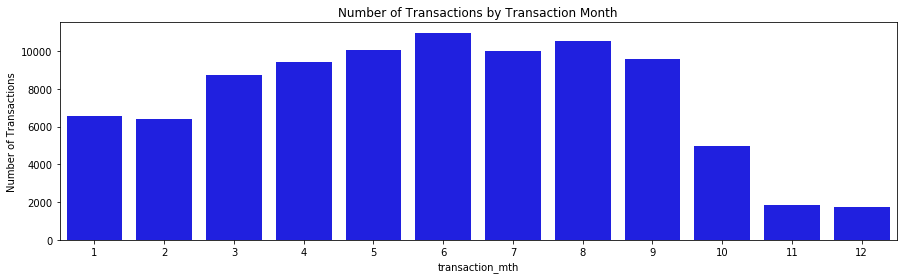

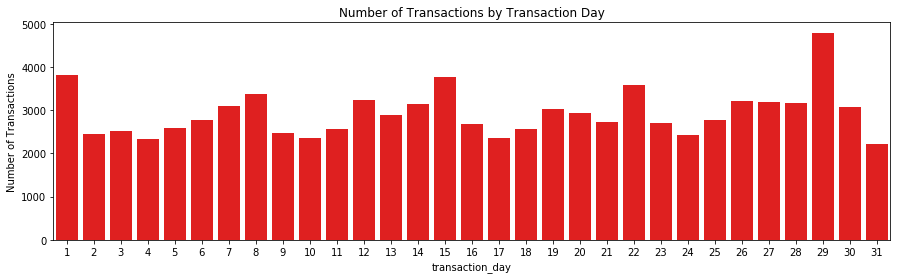

In [13]:
plot_counts(15,4,training_data,'transaction_mth','Number of Transactions by Transaction Month','Number of Transactions',\
                 bar_color='b')
plot_counts(15,4,training_data,'transaction_day','Number of Transactions by Transaction Day','Number of Transactions',\
                 bar_color='r')

**Comment:** Only some of the transactions after 25 Oct 2016 have been included in the training set.  This probably accounts for the abnormally low numbers for months 10, 11 and 12. 

### 1.3 logerror profile

(-0.1, 0.7)

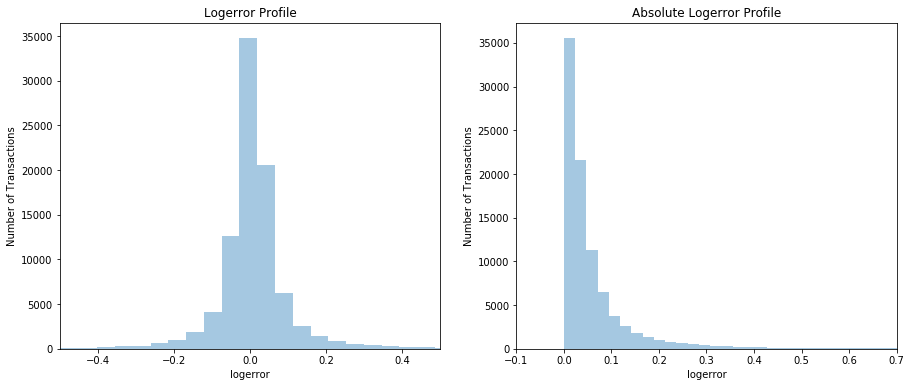

In [14]:
fig=plt.figure(figsize=(15,6))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

g1=sns.distplot(training_data['logerror'],bins=200,kde=False,ax=ax1)
g1.set_title("Logerror Profile")
g1.set_ylabel('Number of Transactions', fontsize=10)
ax1.set_xlim(-0.5,0.5)

g2=sns.distplot(abs(training_data['logerror']),bins=200,kde=False,ax=ax2)
g2.set_title("Absolute Logerror Profile")
g2.set_ylabel('Number of Transactions', fontsize=10)
ax2.set_xlim(-0.1,0.7)

**Comment:** logerror profile appears regular and not especially skewed.  **Or does it??**

#### 1.3.2 Logerror Profile by Transaction Month and Date

In [15]:
def point_n_bar_plot(x_size,y_size,dataset1,x_axis1,y_variable1,title1,y_label1,dataset2,y_label2,point_color='r'):
    
    fig=plt.figure(figsize=(x_size,y_size))
    fig.subplots_adjust(hspace=.5)

    ax1=fig.add_subplot(111)
    ax1_2=ax1.twinx()

    g1=sns.pointplot(x=x_axis1,y=y_variable1,data=dataset1,color=point_color,scatter_kws={'alpha':0.05},ax=ax1)
    ax1.set_title(title1)
    ax1.set_ylabel(y_label1, fontsize=10)
    g1_2=sns.countplot(x=x_axis1,data=training_data,ax=ax1_2,color="grey",alpha=0.5,label=y_label2)
    ax1_2.legend(loc='upper right')

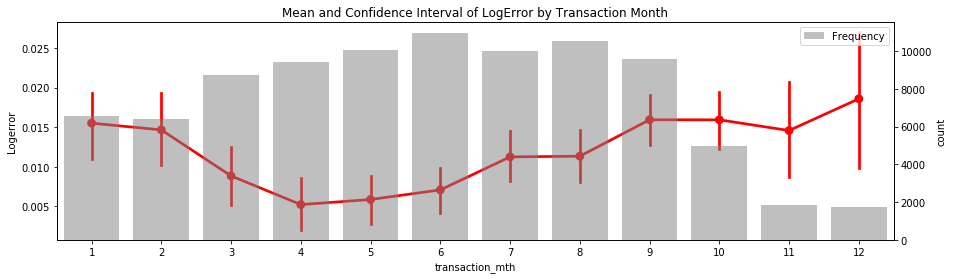

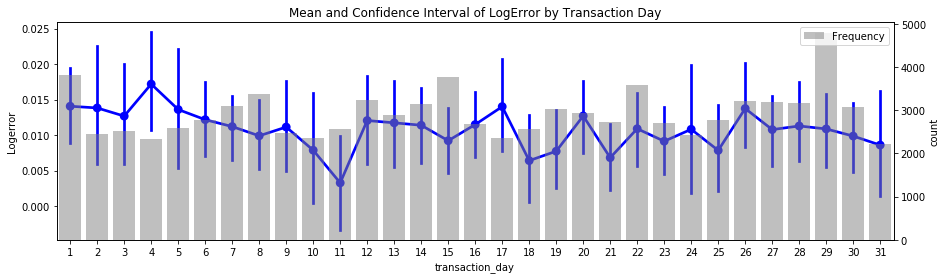

In [16]:
training_data['abs_logerror']=abs(training_data['logerror'])

point_n_bar_plot(15,4,dataset1=training_data,x_axis1='transaction_mth',y_variable1='logerror',title1='Mean and Confidence Interval of LogError by Transaction Month',\
                 y_label1='Logerror',point_color='r',dataset2=training_data,y_label2='Frequency')

point_n_bar_plot(15,4,dataset1=training_data,x_axis1='transaction_day',y_variable1='logerror',title1='Mean and Confidence Interval of LogError by Transaction Day',\
                 y_label1='Logerror',point_color='b',dataset2=training_data,y_label2='Frequency')

**Comment:** Visually, there appears to be an approximately inverse relationship between logerror and exposure (i.e. number of transactions) when viewed on a transaction month basis.  This relationship is less clear when viewed on a transaction day basis.

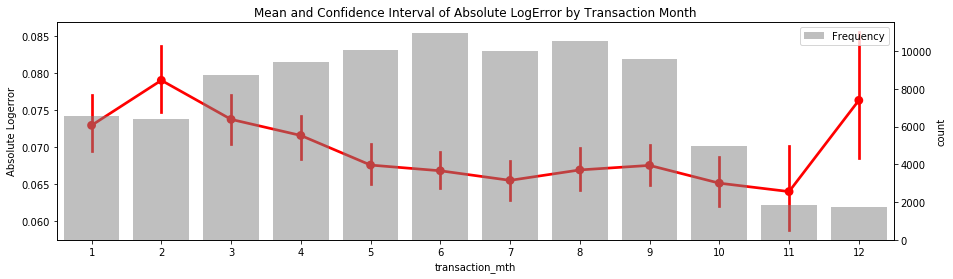

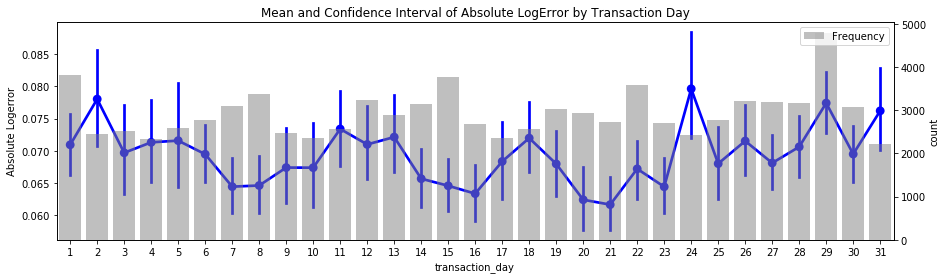

In [17]:
point_n_bar_plot(15,4,dataset1=training_data,x_axis1='transaction_mth',y_variable1='abs_logerror',title1='Mean and Confidence Interval of Absolute LogError by Transaction Month',\
                 y_label1='Absolute Logerror',point_color='r',dataset2=training_data,y_label2='Frequency')

point_n_bar_plot(15,4,dataset1=training_data,x_axis1='transaction_day',y_variable1='abs_logerror',title1='Mean and Confidence Interval of Absolute LogError by Transaction Day',\
                 y_label1='Absolute Logerror',point_color='b',dataset2=training_data,y_label2='Frequency')



**Comment:** Visually, there appears to be an approximately inverse relationship between absolute logerror and exposure (i.e. number of transactions)

## 2. Properties Data

In [18]:
properties_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [19]:
print("Properties data is comprised of %d properties and %d features." % (properties_data.shape[0],properties_data.shape[1]))

Properties data is comprised of 2985217 properties and 58 features.


### 2.1 ALL Properties

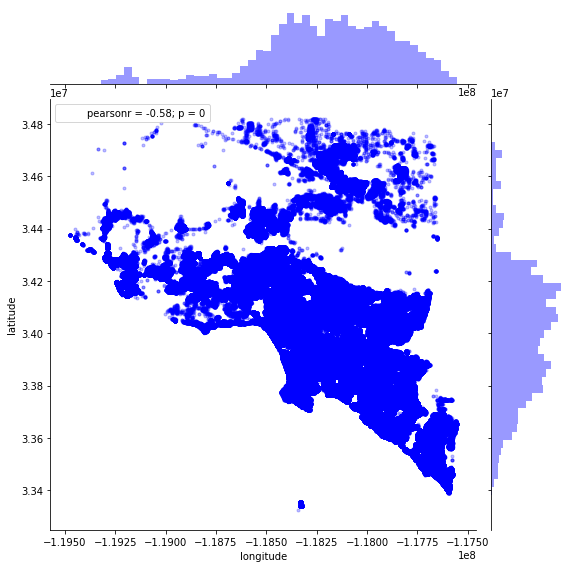

In [20]:
## ALL Properties
plt.figure(figsize=(10,10))
sns.jointplot(x='longitude', y='latitude', data=properties_data, size=8, alpha=.25,
              color='blue', marker='.')

## 3. Merge data
Merging the training data with database of property characteristics

In [21]:
print("properties_data has %d rows and %d columns." % (properties_data.shape[0],properties_data.shape[1]))

properties_data has 2985217 rows and 58 columns.


In [22]:
print("training_data has %d rows and %d columns." % (training_data.shape[0],training_data.shape[1]))

training_data has 90811 rows and 6 columns.


**Comment:** The training data has the original 3 variables plus the inclusion of 3 more variables: 
>transaction_mth, transaction_day, abs_logerror

In [23]:
train_enhanced = pd.merge(training_data, properties_data, on='parcelid', how='left')
train_enhanced.head()

,parcelid,logerror,transactiondate,transaction_mth,transaction_day,abs_logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1,0.0276,1.0,NaN,NaN,2.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,1,0.1684,NaN,NaN,NaN,3.5,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1,0.0040,1.0,NaN,NaN,3.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,2,0.0218,1.0,NaN,NaN,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,2,0.0050,NaN,NaN,NaN,2.5,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [24]:
train_enhanced.head()

,parcelid,logerror,transactiondate,transaction_mth,transaction_day,abs_logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1,0.0276,1.0,NaN,NaN,2.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,1,0.1684,NaN,NaN,NaN,3.5,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1,0.0040,1.0,NaN,NaN,3.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,2,0.0218,1.0,NaN,NaN,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,2,0.0050,NaN,NaN,NaN,2.5,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


**Comment:** Merged data has 63 columns including the transaction date.  If the following 3 features are removed:
    - transactiondate, logerror and abs_logerror
there would be only 60 feature columns.

### 3.2 Properties transacted

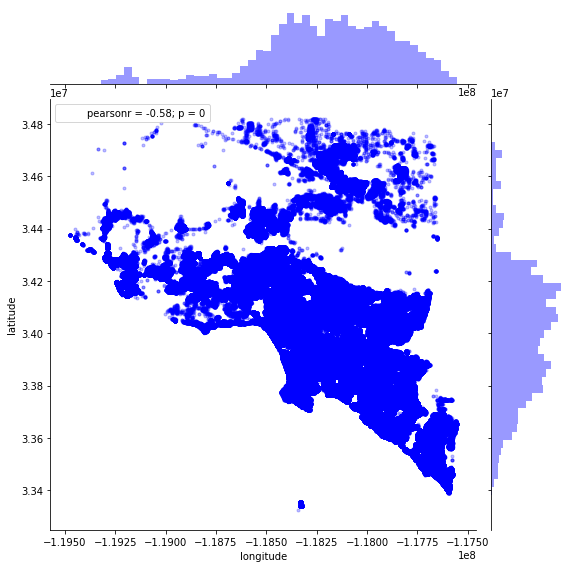

In [25]:

#####################################
## transacted properties
plt.figure(figsize=(10,10))
sns.jointplot(x='longitude', y='latitude', data=properties_data, size=8, alpha=.25,
              color='blue', marker='.')



### 3.3 Properties transacted vs ALL Properties

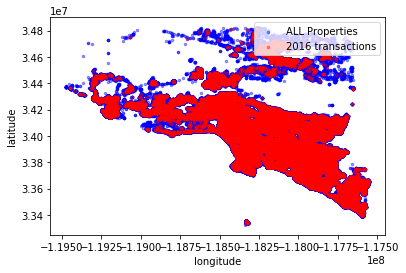

In [26]:
######################################
## transacted vs ALL Properties
plt.figure(figsize=(10,10))
#sns.jointplot(x='longitude', y='latitude', data=train_enhanced, size=8, alpha=.25,
#              color='blue', marker='.')

fig, ax = plt.subplots()
ax.scatter(properties_data['longitude'],properties_data['latitude'],color='b',s=6,alpha=0.4,label='ALL Properties')
ax.scatter(train_enhanced['longitude'],train_enhanced['latitude'],color='r',s=6,alpha=0.4,label='2016 transactions')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.legend(loc='upper right')


## 4. Feature Analysis

### 4.1 Renaming Variables

In [27]:
train_enhanced=train_enhanced.rename(columns={'airconditioningtypeid':'air_cond_type',
                                             'architecturalstyletypeid':'architecture_style',
                                             'basementsqft':'basement_sqft',
                                             'bathroomcnt':'num_bathroom',
                                             'bedroomcnt':'num_bedroom',
                                             'buildingqualitytypeid':'bldg_condition',
                                             'buildingclasstypeid':'bldg_frame_type',
                                             'calculatedbathnbr':'calc_num_bathroom',
                                             'decktypeid':'deck_type',
                                             'threequarterbathnbr':'num_3qtr_bathrms',
                                             'finishedfloor1squarefeet':'1st_flr_living_area',
                                             'calculatedfinishedsquarefeet':'calc_tot_living_area',
                                             'finishedsquarefeet6':'base_fin&unfin_area',
                                             'finishedsquarefeet12':'finished_living_area',
                                             'finishedsquarefeet13':'perimeter_living_area',
                                             'finishedsquarefeet15':'total_area',
                                             'finishedsquarefeet50':'1st_flr_finished_area',
                                             'fips':'processing_code',
                                             'fireplacecnt':'num_fireplaces',
                                             'fireplaceflag':'fireplace_flag',
                                             'fullbathcnt':'num_full_bathrms',
                                             'garagecarcnt':'num_garages',
                                             'garagetotalsqft':'total_garage_area',
                                             'hashottuborspa':'hot_tub_flag',
                                             'heatingorsystemtypeid':'heating_type',
                                             'lotsizesquarefeet':'lot_area',
                                             'numberofstories':'num_levels',
                                             'poolcnt':'num_pools',
                                             'poolsizesum':'total_pools_area',
                                             'pooltypeid10':'pool_type',
                                             'pooltypeid2':'pool_with_hot_tub',
                                             'pooltypeid7':'pool_without_hot_tub',
                                             'propertycountylandusecode':'county_land_use_code',
                                             'propertylandusetypeid':'land_use_type',
                                             'propertyzoningdesc':'land_use_desc',
                                             'rawcensustractandblock':'raw_census_id',
                                             'censustractandblock':'census_id',
                                             'regionidcounty':'county_id',
                                             'regionidcity':'city_id',
                                             'regionidzip':'zip_code',
                                             'regionidneighborhood':'neighborhood_id',
                                             'roomcnt':'num_rooms',
                                             'storytypeid':'storey_type',
                                             'typeconstructiontypeid':'construction_type',
                                             'unitcnt':'num_units',
                                             'yardbuildingsqft17':'patio',
                                             'yardbuildingsqft26':'storage_shed',
                                             'yearbuilt':'year_built',
                                             'taxvaluedollarcnt':'parcel_tax_value',
                                             'structuretaxvaluedollarcnt':'structure_tax_value',
                                             'landtaxvaluedollarcnt':'land_tax_value',
                                             'taxamount':'tot_property_tax',
                                             'assessmentyear':'tax_assessmnt_year',
                                             'taxdelinquencyflag':'tax_delinqncy_flag',
                                             'taxdelinquencyyear':'tax_delinqncy_year',
                                             })

### 4.2 Data Housekeeping
Removing non-useful variables or restating variables

In [28]:
# remove 'parcelid' and 'transactiondate' (transactiondate has been re-represented as 'transaction_mth' and 'transaction_day'
train_enhanced=train_enhanced.drop(['transactiondate','parcelid'],axis=1)
print("Dimension of merged dataset: " , train_enhanced.shape)

Dimension of merged dataset:  (90811, 61)


#### 4.2.1. Data Transformations

(4.2.1.1) Restating year_built to building_age

In [29]:
train_enhanced['bldg_age']=2016-train_enhanced['year_built']
train_enhanced=train_enhanced.drop('year_built',axis=1)

(4.2.1.2) Restating tax_delinqncy_year to tax_delinqncy_age

In [30]:
train_enhanced['tax_delinqncy_year'].unique()

array([ nan,  13.,  15.,  12.,  14.,  10.,   9.,   8.,  11.,   7.,   6.,
        99.])

In [31]:
train_enhanced['tax_delinqncy_age']=16-train_enhanced['tax_delinqncy_year']

In [32]:
train_enhanced['tax_delinqncy_age'].unique()

array([ nan,   3.,   1.,   4.,   2.,   6.,   7.,   8.,   5.,   9.,  10.,
       -83.])

In [33]:
train_enhanced['tax_delinqncy_age'].replace(-83, 17.,inplace=True)

In [34]:
train_enhanced['tax_delinqncy_age'].unique()

array([ nan,   3.,   1.,   4.,   2.,   6.,   7.,   8.,   5.,   9.,  10.,
        17.])

In [35]:
train_enhanced=train_enhanced.drop('tax_delinqncy_year',axis=1)

#### 4.2.2 Removing Variables which are used as identifiers
eg census_id & raw_census_id

In [36]:
train_enhanced=train_enhanced.drop(['census_id','raw_census_id','processing_code'],axis=1)

In [37]:
train_enhanced.shape

(90811, 58)

#### 4.2.3 Categorical Variables
transforming variables with no numerical relationship to categorical variables


(4.2.3.1) Identify candidates for inclusion as categorical variables

In [38]:
def show_data_type(df):
    
    pd.options.display.max_rows = df.shape[0]+10

    df_dtype = df.dtypes.reset_index()
    df_dtype.columns = ["Item", "Data Type"]
    
    return df_dtype

In [39]:
def uniques(x):
    return train_enhanced[x].unique()

def num_uniques(x):
    return len(train_enhanced[x].unique())

def perc_nulls(x):
    return float(nulls_details[nulls_details['Item']==x]['%'])

def data_type(x):
    return train_enhanced[x].dtype

def dataset_summary(dataset):
    
    df=pd.DataFrame({'Item':dataset.columns})
    df['Uniques']=df['Item'].apply(uniques)
    df['Num_Uniques']=df['Item'].apply(num_uniques)
    df['Data Type']=df['Item'].apply(data_type)
    #df['%_nulls']=df['Item'].apply(perc_nulls)
    df=df.sort_values(by=['Num_Uniques'],ascending=True)
    return df

In [40]:
dataset_summary(train_enhanced)

,Item,Uniques,Num_Uniques,Data Type
9,bldg_frame_type,"[nan, 4.0]",2,float64
33,pool_without_hot_tub,"[nan, 1.0]",2,float64
42,storey_type,"[nan, 7.0]",2,float64
49,fireplace_flag,"[nan, True]",2,object
32,pool_with_hot_tub,"[nan, 1.0]",2,float64
31,pool_type,"[nan, 1.0]",2,float64
29,num_pools,"[nan, 1.0]",2,float64
24,hot_tub_flag,"[nan, True]",2,object
52,tax_assessmnt_year,"[2015.0, nan]",2,float64
12,deck_type,"[nan, 66.0]",2,float64


**Comment:** Variables with only 2 unique values or which are of data type 'object' are candidates for tranformation to categorical variables.

#### Identify categorical variables

In [41]:
# in preparation to encode categorical variables, first change the type of the value to a string:
to_categorical=['tax_assessmnt_year','num_pools','hot_tub_flag','pool_without_hot_tub','pool_with_hot_tub','tax_delinqncy_flag','fireplace_flag','storey_type','architecture_style','air_cond_type','zip_code','bldg_frame_type','deck_type','heating_type','pool_type','county_land_use_code','land_use_type','land_use_desc','city_id','county_id','neighborhood_id','construction_type']
categorical_vars=train_enhanced[to_categorical]

print("%s items have been identified as categorical variables" % len(to_categorical))

22 items have been identified as categorical variables


(4.2.3.2) Fill empty cells of categorical variables with 'NA'

In [42]:
categorical_vars=categorical_vars.fillna('NA')

Check the number of columns that will result from one hot encoding categorical variables

In [43]:
categorical_vars_summary=dataset_summary(categorical_vars)
categorical_vars_summary

,Item,Uniques,Num_Uniques,Data Type
0,tax_assessmnt_year,"[2015.0, nan]",2,float64
1,num_pools,"[nan, 1.0]",2,float64
2,hot_tub_flag,"[nan, True]",2,object
3,pool_without_hot_tub,"[nan, 1.0]",2,float64
4,pool_with_hot_tub,"[nan, 1.0]",2,float64
5,tax_delinqncy_flag,"[nan, Y]",2,object
6,fireplace_flag,"[nan, True]",2,object
7,storey_type,"[nan, 7.0]",2,float64
14,pool_type,"[nan, 1.0]",2,float64
12,deck_type,"[nan, 66.0]",2,float64


In [44]:
print('Total number of columns if categorical variables are one hot encoded: %d' % categorical_vars_summary['Num_Uniques'].sum())

Total number of columns if categorical variables are one hot encoded: 3209


**Observations:** 
- Large number of unique values in variables such as land_use_desc, neighborhood_id and zip_code.
- Some variables which have been chosen to be transformed into categorical variables as they only have two unique values, including empty cells.  If they are treated as float or integer variables instead, it would not be possible to impute empty values with any value that would be sensible without destroying the information content of that variable.

#### 4.2.4 Non Categorical Variables
Investigate the non categorical variables to see if they should indeed be numeric and that there is a numerical relationship between the variable values.

In [45]:
non_categorical_vars=train_enhanced
non_categorical_vars=non_categorical_vars.drop(to_categorical,axis=1)
non_categorical_vars=non_categorical_vars.drop(['logerror','abs_logerror'],axis=1)
#non_categorical_vars.shape


#######################
non_categorical_vars_summary=dataset_summary(non_categorical_vars)
non_categorical_vars_summary

,Item,Uniques,Num_Uniques,Data Type
27,num_levels,"[nan, 2.0, 1.0, 3.0, 4.0]",5,float64
23,num_3qtr_bathrms,"[nan, 1.0, 2.0, 3.0, 4.0]",5,float64
14,num_fireplaces,"[nan, 1.0, 2.0, 3.0, 4.0, 5.0]",6,float64
5,bldg_condition,"[4.0, nan, 1.0, 7.0, 12.0, 10.0, 8.0, 6.0, 11.0]",9,float64
24,num_units,"[1.0, nan, 2.0, 4.0, 3.0, 6.0, 143.0, 11.0, 9....",11,float64
0,transaction_mth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12,int64
10,perimeter_living_area,"[nan, 1392.0, 1440.0, 1536.0, 1344.0, 1566.0, ...",12,float64
33,tax_delinqncy_age,"[nan, 3.0, 1.0, 4.0, 2.0, 6.0, 7.0, 8.0, 5.0, ...",12,float64
15,num_full_bathrms,"[2.0, 3.0, 4.0, 1.0, 5.0, 8.0, nan, 9.0, 7.0, ...",15,float64
16,num_garages,"[nan, 2.0, 1.0, 3.0, 0.0, 4.0, 6.0, 8.0, 5.0, ...",16,float64


#### Check the data types of the non categorical variables.  They must numeric.

In [46]:
non_categorical_vars_summary.groupby('Data Type').aggregate('count')

,Item,Uniques,Num_Uniques
Data Type,,,
int64,2,2,2
float64,32,32,32


**Comment:** apart from <b><i>`transaction_mth`</b></i> and <b><i>`transaction_day`</b></i>, all the remaining non categorical variables are of type <b>'float64'</b>.

See how the non-categorical variables are distributed to spot for unusual distributions.

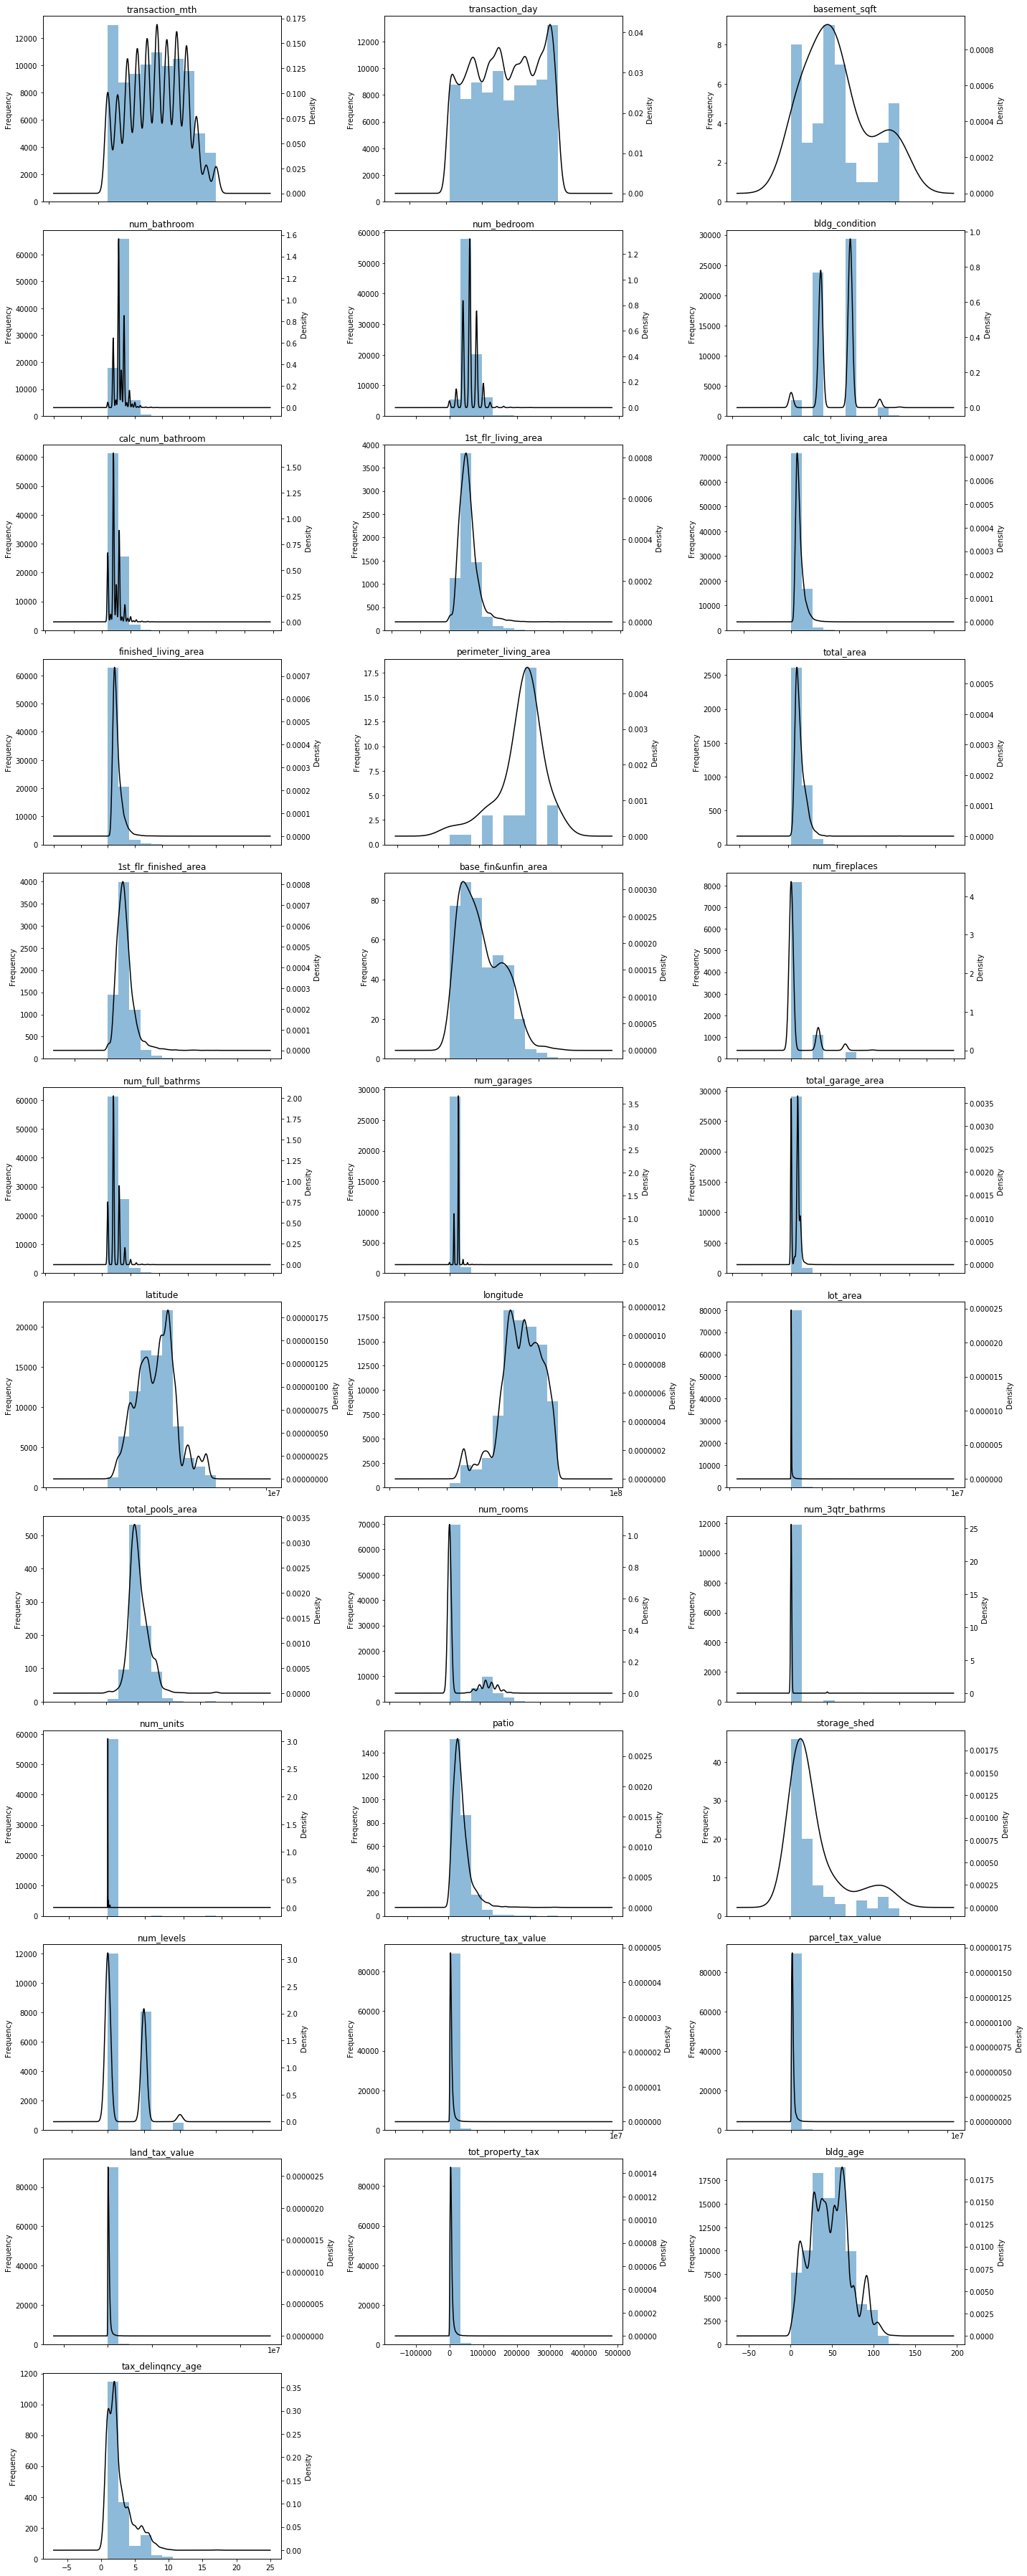

In [47]:
import math

def draw_hist_dist(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,50))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #ax1=fig.add_subplot(111)
        ax2=ax.twinx()

        #df[var_name].hist(bins=20,ax=ax)
        df[var_name].plot(kind='hist',ax=ax,alpha=0.5) #(ax=ax)
        df[var_name].plot(kind='density',ax=ax2,color='black') #(ax=ax)
        ax.set_title(var_name)
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_hist_dist(non_categorical_vars, non_categorical_vars.columns, math.ceil(non_categorical_vars.shape[1]/3), 3)


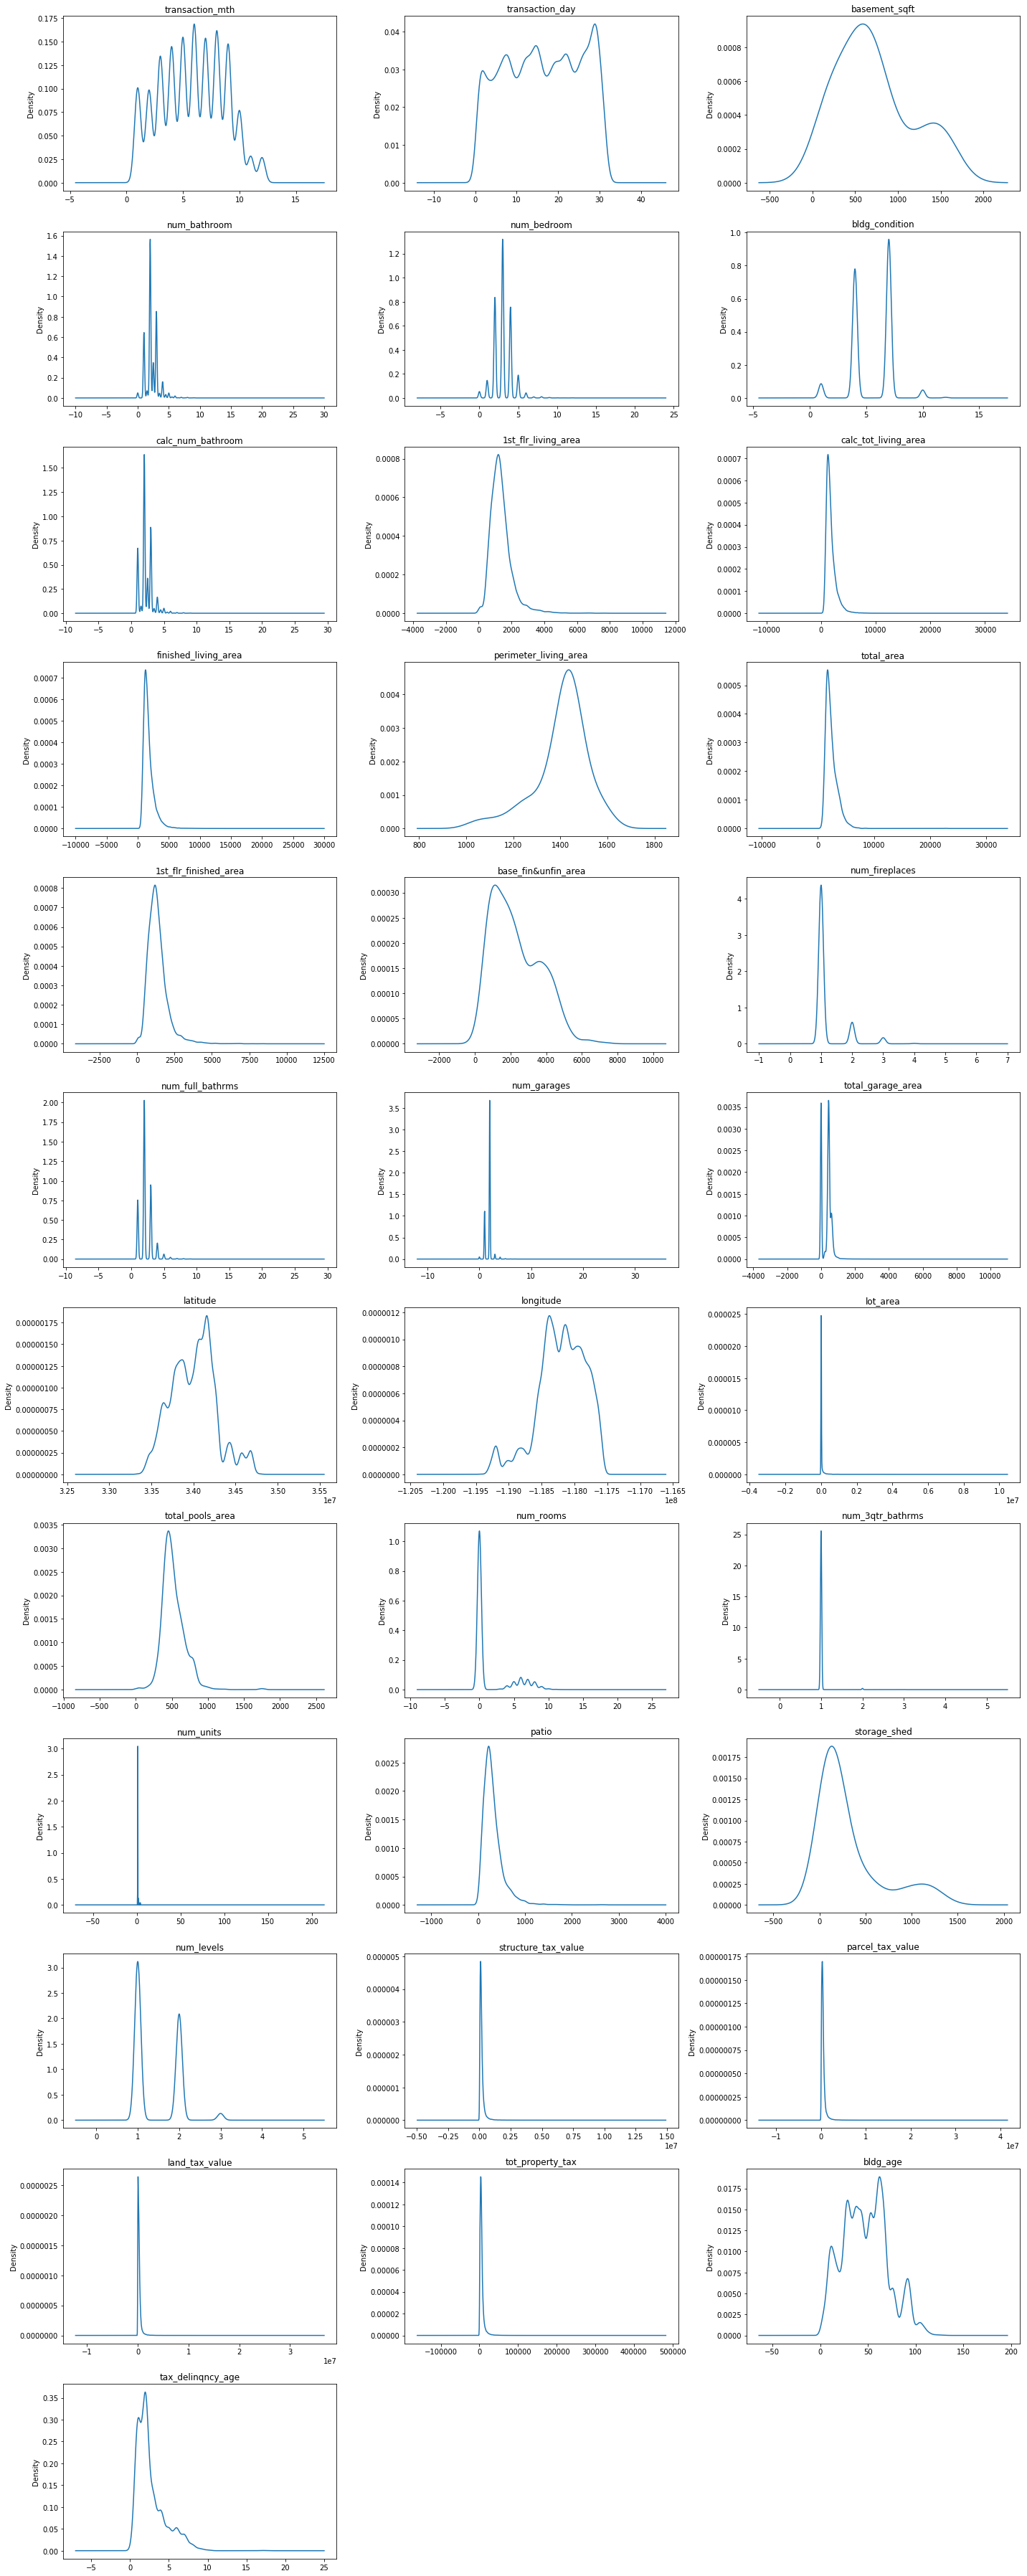

In [48]:
def draw_dist(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,50))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #df[var_name].hist(bins=20,ax=ax)
        df[var_name].plot(kind='density') #(ax=ax)
        ax.set_title(var_name)
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_dist(non_categorical_vars, non_categorical_vars.columns, math.ceil(non_categorical_vars.shape[1]/3), 3)


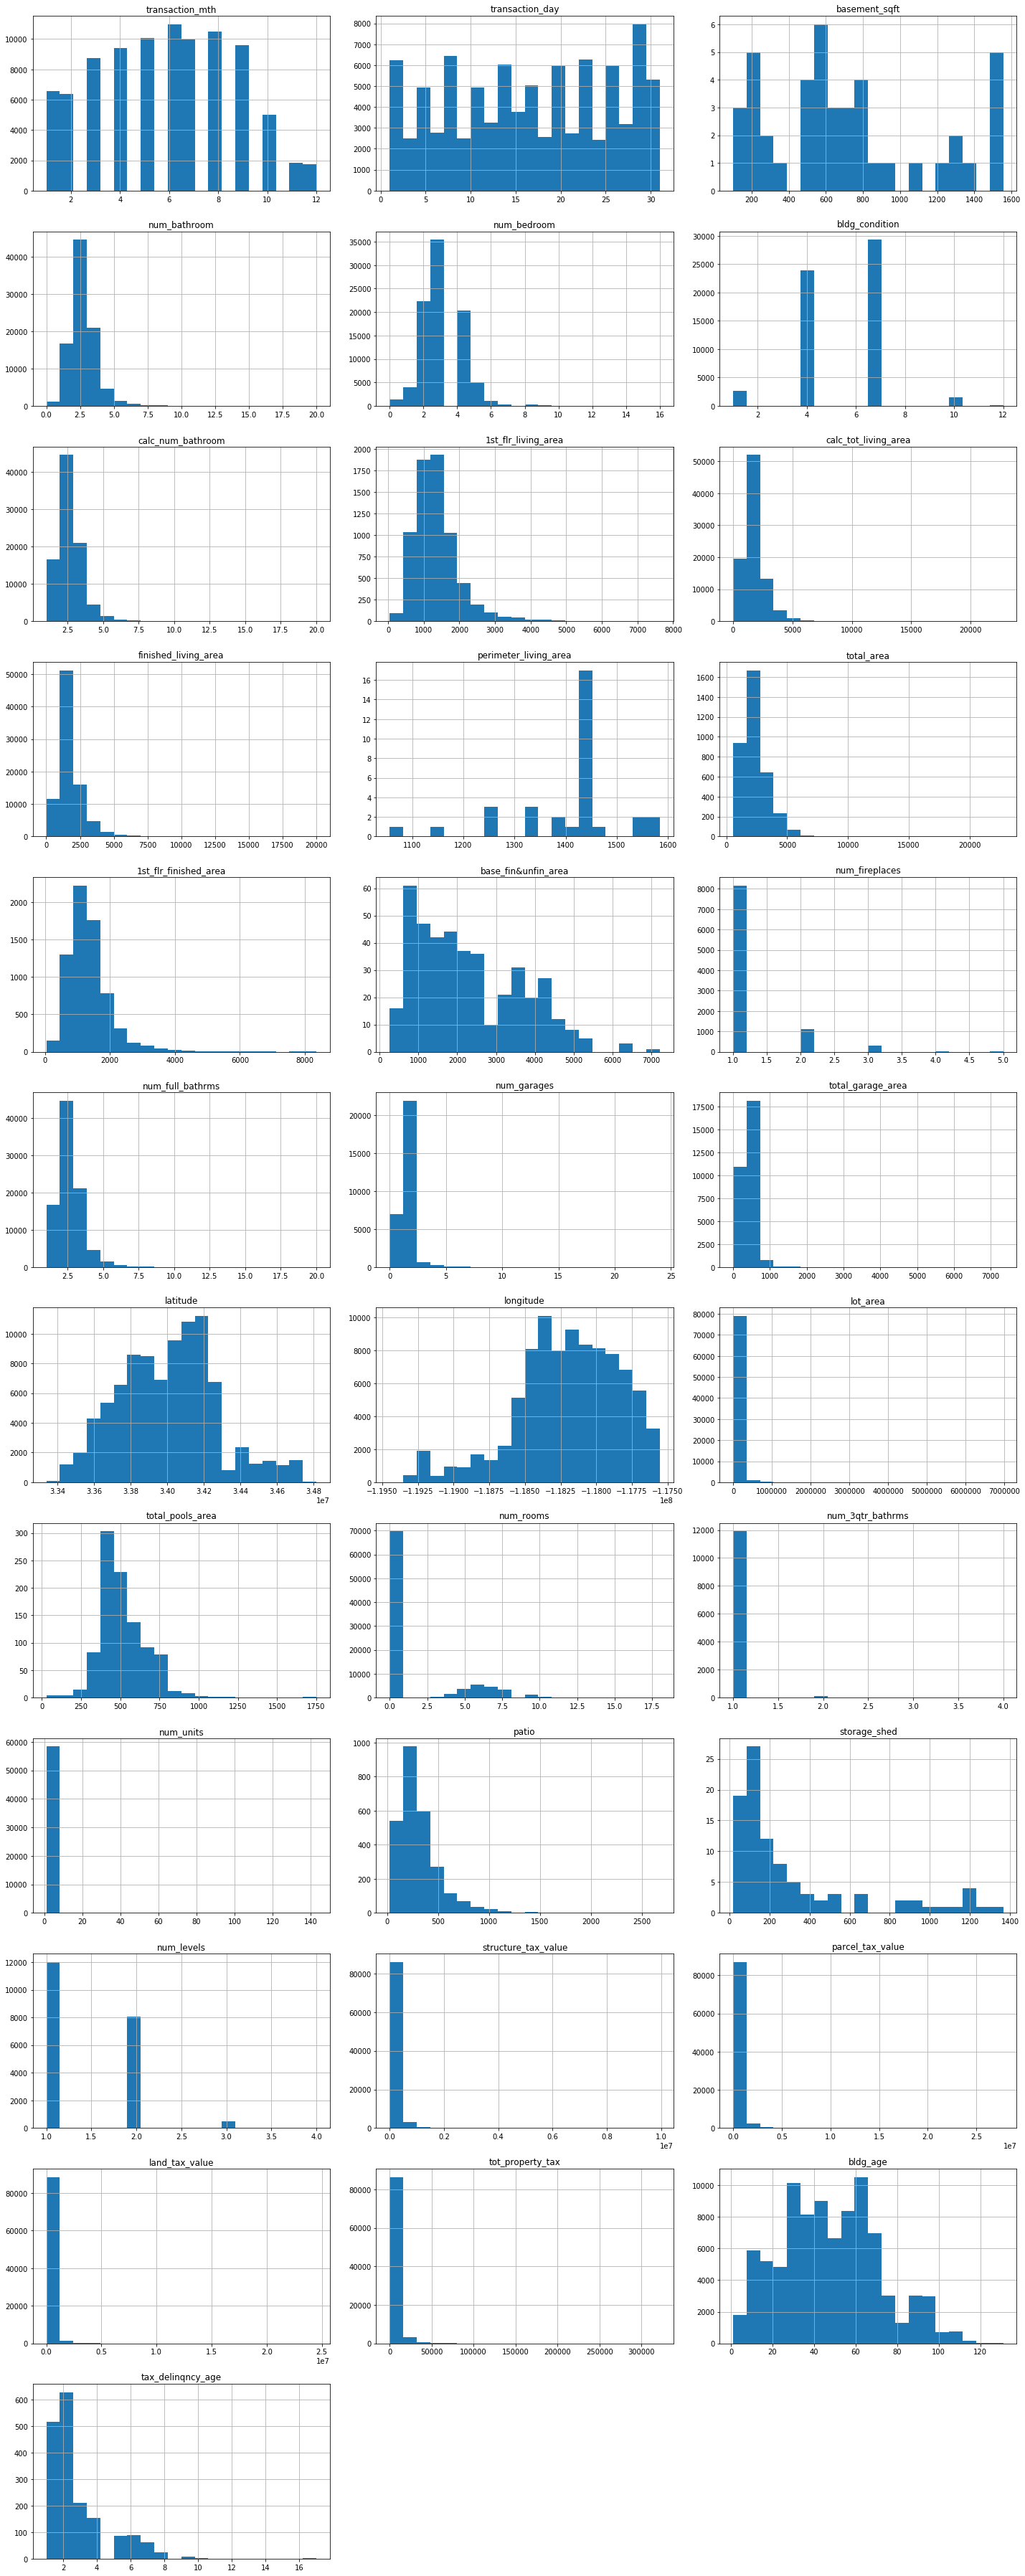

In [49]:
import math

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,50))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        #df[var_name].hist(ax=ax)
        ax.set_title(var_name)
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(non_categorical_vars, non_categorical_vars.columns, math.ceil(non_categorical_vars.shape[1]/3), 3)

#visuals.hist()
#plt.show()

**Comment:** the structure_tax_value, parcel_tax_value, land_tax_value, tot_property_tax, lot_area, num_units look like they could do with a zoom in.

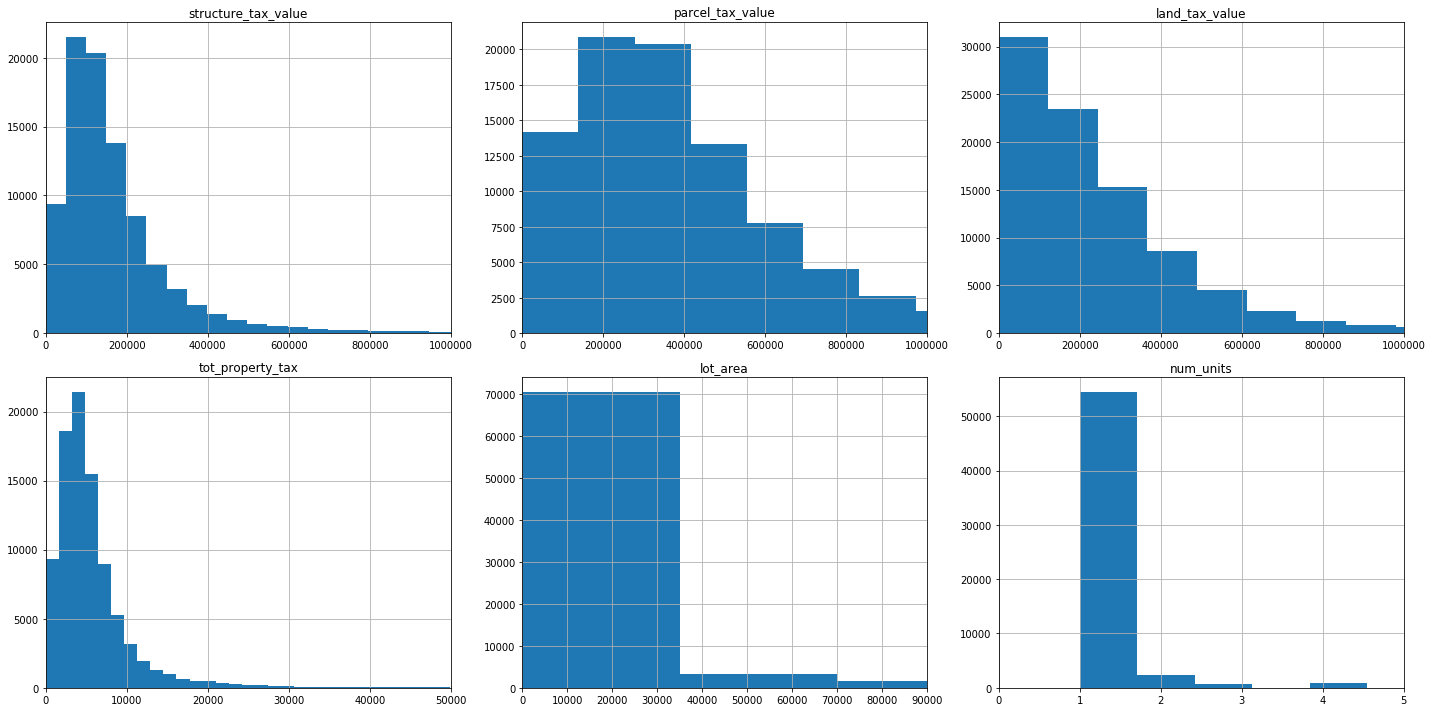

In [50]:
def draw_histograms_zoom(df, variables, n_rows, n_cols,axes):
    fig=plt.figure(figsize=(20,10))
    #fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=200,ax=ax)
        #df[var_name].hist(ax=ax)
        x_min,x_max=axes[i]
        ax.set_title(var_name)
        ax.set_xlim(x_min,x_max)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

to_zoom=['structure_tax_value', 
         'parcel_tax_value', 'land_tax_value','tot_property_tax','lot_area', 'num_units']
axes=[(0,1000000),(0,1000000),(0,1000000),(0,50000),(0,90000),(0,5)]

draw_histograms_zoom(non_categorical_vars, to_zoom, math.ceil(len(to_zoom)/3), 3,axes)

**Comment:** The float variables look like they have sensible distributions and, in relation to their descriptions, do seem to have a numerical relationship to each other.

### 4.3 Data Investigations
#### 4.3.1 Investigating NULL values

In [51]:
def get_nulls_details(dataset):
    num_nulls=dataset.isnull().sum(axis=0).reset_index()
    num_nulls.columns = ["Item", "Num NULLS"]
    num_nulls['%']=num_nulls['Num NULLS']/dataset.shape[0]
    num_nulls_sorted=num_nulls.sort_values(by=['Num NULLS'],ascending=False)

    return num_nulls_sorted

In [52]:
def plot_horizontal_bars(x_size,y_size,title,dataset,plot_variable,y_axis,x_label):
    fig,ax= plt.subplots()
    fig.set_size_inches(x_size,y_size)

    items=np.arange(len(dataset[plot_variable]))
    rects = ax.barh(items,dataset[plot_variable], color='blue')
    ax.set_yticks(items)
    ax.set_yticklabels(dataset[y_axis], rotation='horizontal')
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.show()

In [53]:
nulls_details=get_nulls_details(train_enhanced)

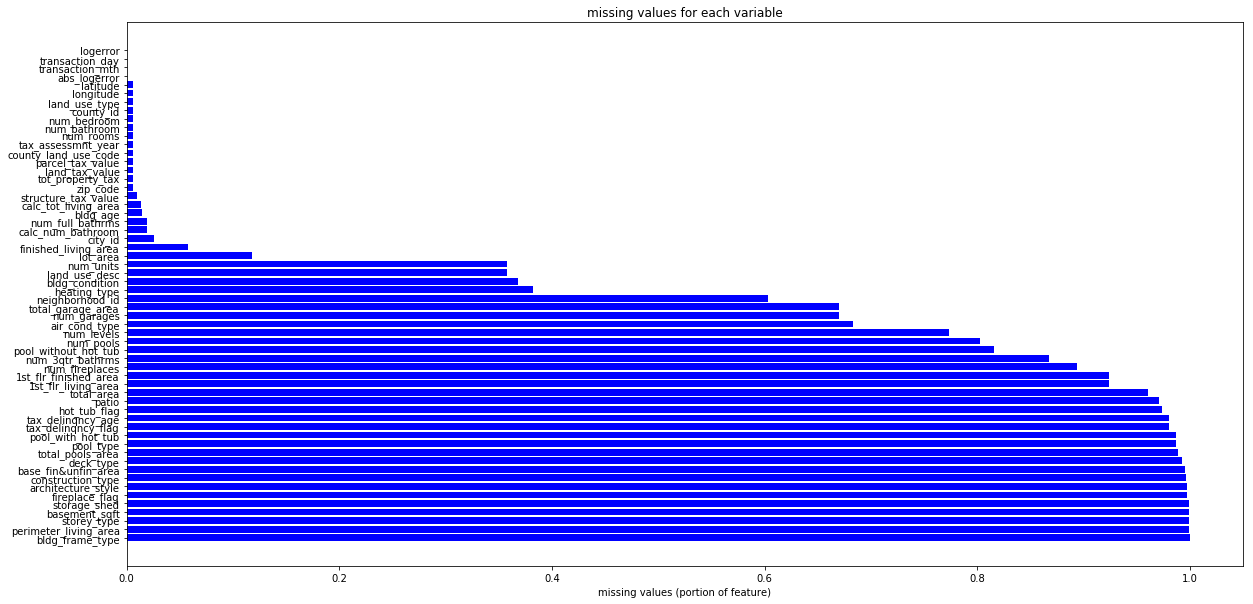

In [54]:
plot_horizontal_bars(20,10,"missing values for each variable",nulls_details,'%','Item','missing values (portion of feature)')

**Comment:** A large number of property characteristics have a significant proportion of NULL values.

In [55]:
nulls_details

,Item,Num NULLS,%
9,bldg_frame_type,90795,0.999824
16,perimeter_living_area,90778,0.999637
42,storey_type,90768,0.999526
6,basement_sqft,90768,0.999526
47,storage_shed,90716,0.998954
49,fireplace_flag,90589,0.997555
5,architecture_style,90550,0.997126
44,construction_type,90512,0.996707
19,base_fin&unfin_area,90390,0.995364
12,deck_type,90153,0.992754


##### 4.3.1.2 NULL values by type of variable

In [56]:
def data_category(x):
    if x in non_categorical_vars.columns:
        return 'Numeric'
    elif x in categorical_vars.columns:
        return 'Categorical'


In [57]:
nulls_details['Category']=nulls_details['Item'].apply(data_category)
#nulls_details

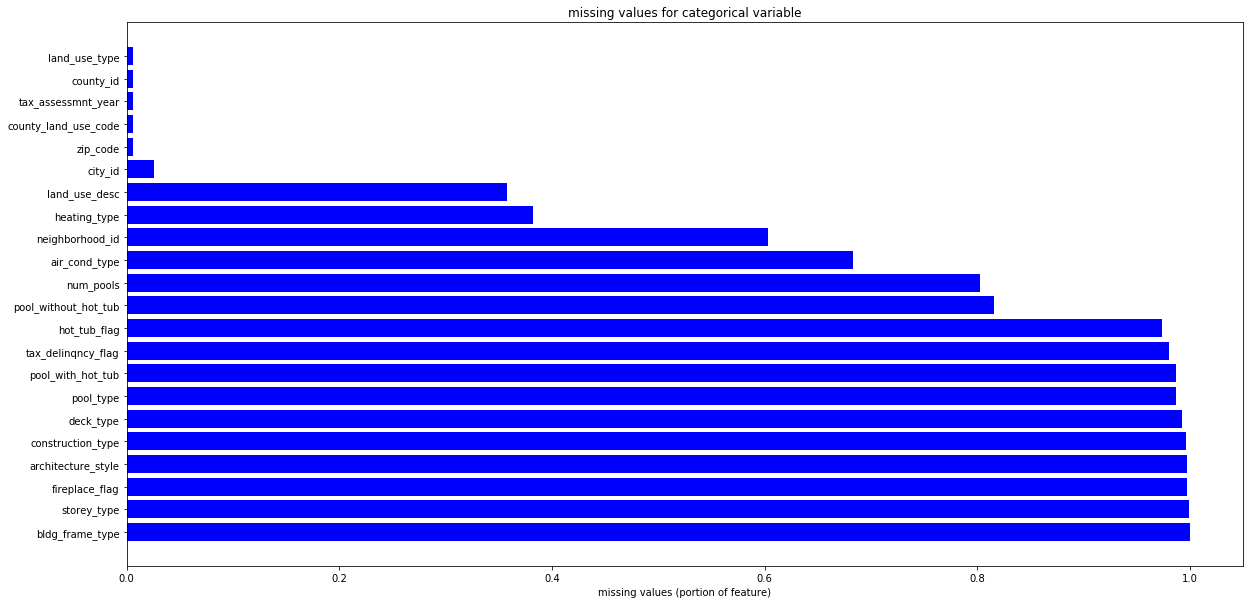

In [58]:
plot_horizontal_bars(20,10,"missing values for categorical variable",\
                     nulls_details[nulls_details['Category']=='Categorical'],'%','Item','missing values (portion of feature)')

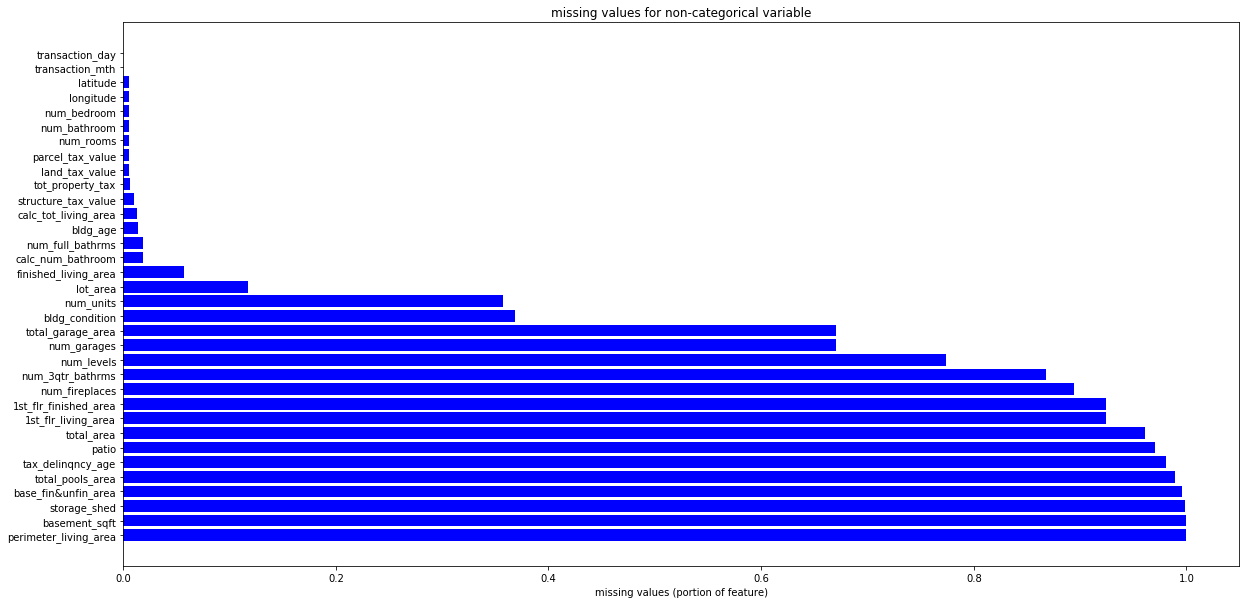

In [59]:
plot_horizontal_bars(20,10,"missing values for non-categorical variable",\
                     nulls_details[nulls_details['Category']=='Numeric'],'%','Item','missing values (portion of feature)')

##### 4.3.1.3 Sparse Variables

In [60]:
def get_non_sparse_features(cutoff,nulls_db,analysis_column,feature_name_column,exceptions_list):
    non_sparse_columns=nulls_db[nulls_db[analysis_column]<=float(cutoff)]

    non_sparse_features=list(non_sparse_columns[feature_name_column])
    non_sparse_features = [e for e in non_sparse_features if e not in exceptions_list]
    
    print("Only %d variables have less than %.2f%% NULL values" % (len(non_sparse_features),cutoff*100))
    return non_sparse_features

In [61]:
#exceptions=['logerror','abs_logerror','parcelid','transactiondate','transaction_day','transaction_mth']
exceptions=['logerror','abs_logerror','parcelid','transactiondate']

non_sparse_features=get_non_sparse_features(cutoff=0.8,nulls_db=nulls_details,analysis_column='%',feature_name_column='Item',exceptions_list=exceptions)

Only 32 variables have less than 80.00% NULL values


**Comment:** One possible action from this investigation is to the remove the variables which have a large proportion of NULL values.

In [62]:
def get_sparse_features(cutoff,nulls_db,analysis_column,feature_name_column,exceptions_list):
    #columns_to_remove=num_nulls_sorted[nulls_db[analysis_column]>float(cutoff)]
    columns_to_remove=nulls_db[nulls_db[analysis_column]>float(cutoff)]
    sparse_features=list(columns_to_remove[feature_name_column])

    sparse_features = [e for e in sparse_features if e not in exceptions_list]
    
    print("At %.2f%% cutoff, there are %d items to remove." % (cutoff*100,len(sparse_features)))
    return sparse_features

In [63]:
sparse_features=get_sparse_features(cutoff=0.95,nulls_db=nulls_details,analysis_column='%',feature_name_column='Item',exceptions_list=exceptions)

At 95.00% cutoff, there are 18 items to remove.


### Correlation Coefficients

#### Prepare data for correlation calculation

In [64]:
# Impute the missing values with mean values to compute correlation coefficients #
mean_values = train_enhanced.mean(axis=0)
train_new = train_enhanced.fillna(mean_values, inplace=True)

#### Calcute correlations

In [65]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_enhanced.columns if col not in ['logerror','abs_logerror','transactiondate','parcelid'] if train_enhanced[col].dtype=='float64']
cur_col=''
items = []
correlations = []
for col in x_cols:
    cur_col=col # cur_col is a diagnostic variable, and is only used for troubleshooting
    items.append(col)
    correlations.append(np.corrcoef(train_new[col].values, train_new['logerror'].values)[0,1])

corr_df = pd.DataFrame({'col_labels':items, 'corr_values':correlations})
corr_df = corr_df.sort_values(by='corr_values')


C:\ProgramData\Anaconda2\envs\neural_nets\lib\site-packages\numpy\lib\function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda2\envs\neural_nets\lib\site-packages\numpy\lib\function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


#### visualise correlations

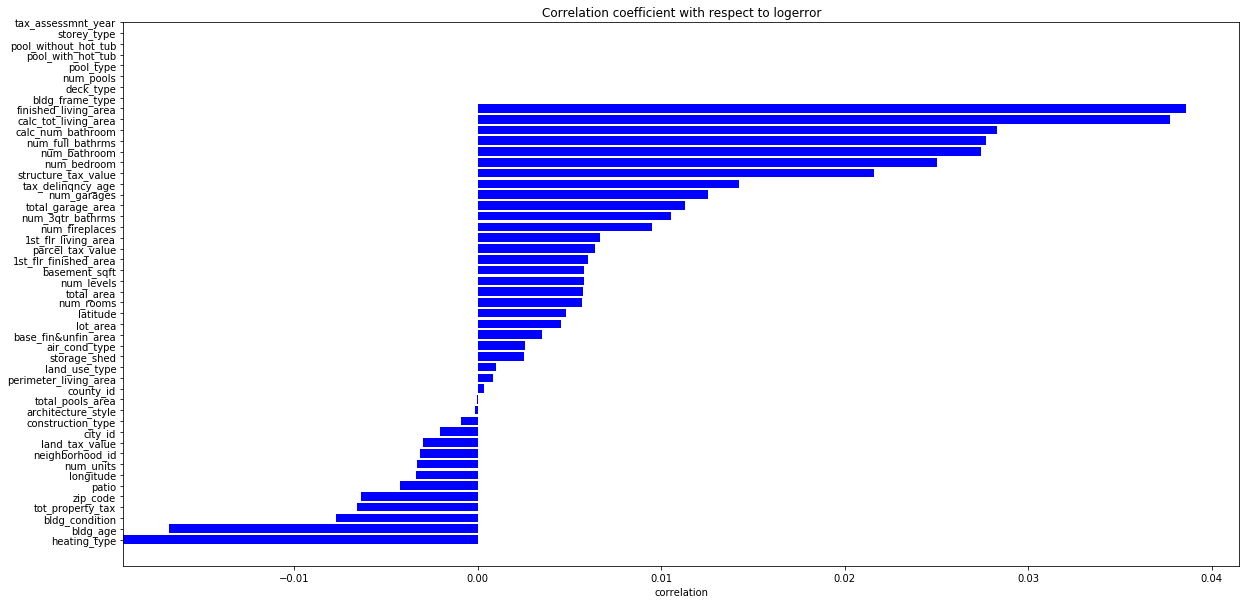

In [66]:
plot_horizontal_bars(20,10,"Correlation coefficient with respect to logerror",\
                     corr_df,'corr_values','col_labels','correlation')

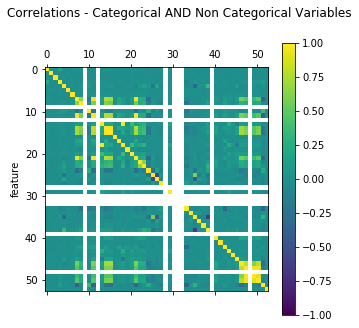

In [67]:
# correlation matrix
fig,ax= plt.subplots(figsize=(5,5))
fig.suptitle('Correlations - Categorical AND Non Categorical Variables')
cax=ax.matshow(train_new.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
#ax.set_title('All Variables')
ax.set_ylabel('feature')
plt.show()

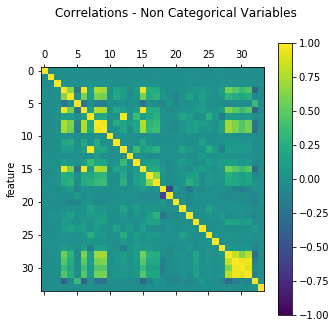

In [68]:
# correlation matrix
fig,ax= plt.subplots(figsize=(5,5))
fig.suptitle('Correlations - Non Categorical Variables')
cax=ax.matshow(train_new[non_categorical_vars.columns].corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
#ax.set_title('All Variables')
ax.set_ylabel('feature')
plt.show()

In [69]:
corr_matrix=train_new.corr()
corr_matrix

,logerror,transaction_mth,transaction_day,abs_logerror,air_cond_type,architecture_style,basement_sqft,num_bathroom,num_bedroom,bldg_frame_type,...,patio,storage_shed,num_levels,structure_tax_value,parcel_tax_value,tax_assessmnt_year,land_tax_value,tot_property_tax,bldg_age,tax_delinqncy_age
logerror,1.000000,0.008033,-0.005233,0.224626,2.551791e-03,-1.639094e-04,5.810177e-03,0.027431,0.025048,NaN,...,-4.265357e-03,2.519892e-03,5.808066e-03,0.021575,0.006401,NaN,-0.003001,-0.006561,-0.016808,1.422250e-02
transaction_mth,0.008033,1.000000,-0.050567,-0.018746,-7.317379e-04,9.677576e-03,-3.500726e-03,0.003790,0.011082,NaN,...,-2.888123e-03,2.105651e-03,2.778765e-04,-0.004551,-0.006042,NaN,-0.007447,-0.014287,-0.001494,-2.782355e-02
transaction_day,-0.005233,-0.050567,1.000000,0.003294,6.990725e-03,-2.992101e-03,-2.086936e-03,-0.005677,-0.001761,NaN,...,-3.508542e-03,2.898359e-04,1.561918e-03,-0.004655,-0.006680,NaN,-0.006704,-0.007825,-0.004919,-5.286181e-03
abs_logerror,0.224626,-0.018746,0.003294,1.000000,-9.710424e-03,2.324015e-04,4.903875e-03,-0.006435,0.001200,NaN,...,3.399553e-04,-4.724556e-04,-9.534845e-03,0.026501,0.037719,NaN,0.039323,0.047492,0.112490,1.330748e-02
air_cond_type,0.002552,-0.000732,0.006991,-0.009710,1.000000e+00,-9.192014e-03,-1.282950e-22,-0.021197,0.041967,NaN,...,1.637842e-23,3.770922e-24,1.214007e-01,-0.033454,-0.000715,NaN,0.016398,-0.018230,0.034871,-2.261209e-03
architecture_style,-0.000164,0.009678,-0.002992,0.000232,-9.192014e-03,1.000000e+00,-3.091605e-21,-0.000101,0.002502,NaN,...,3.937638e-22,9.082094e-23,-8.871631e-03,-0.000696,0.000566,NaN,0.001147,0.000368,-0.000124,-4.974116e-22
basement_sqft,0.005810,-0.003501,-0.002087,0.004904,-1.282950e-22,-3.091605e-21,1.000000e+00,0.010639,0.010270,NaN,...,2.405279e-02,3.623796e-03,2.151400e-02,0.015342,0.007136,NaN,0.001893,0.006946,-0.012817,2.202707e-21
num_bathroom,0.027431,0.003790,-0.005677,-0.006435,-2.119730e-02,-1.008925e-04,1.063946e-02,1.000000,0.646120,NaN,...,3.943488e-02,1.095304e-02,1.223009e-01,0.581032,0.476363,NaN,0.353806,0.461897,-0.360501,-1.442864e-02
num_bedroom,0.025048,0.011082,-0.001761,0.001200,4.196684e-02,2.502371e-03,1.026982e-02,0.646120,1.000000,NaN,...,3.881941e-02,4.926408e-03,6.131099e-02,0.301622,0.241328,NaN,0.173205,0.239107,-0.039722,-8.797677e-03
bldg_frame_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


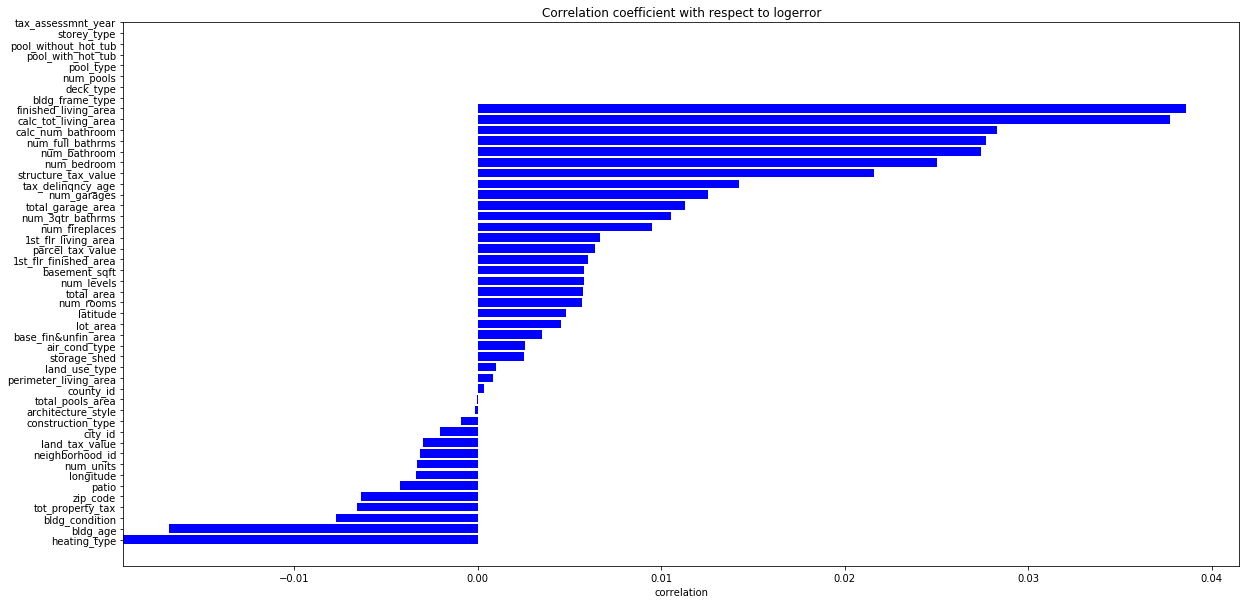

In [70]:
plot_horizontal_bars(20,10,"Correlation coefficient with respect to logerror",\
                     corr_df,'corr_values','col_labels','correlation')

In [71]:
corr_df.columns=['Item','Correlation']

In [72]:
corr_df.head()

,Item,Correlation
20,heating_type,-0.019325
47,bldg_age,-0.016808
6,bldg_condition,-0.007750
46,tot_property_tax,-0.006561
33,zip_code,-0.006391


In [73]:
corr_df.tail(10)

,Item,Correlation
10,calc_tot_living_area,0.037711
11,finished_living_area,0.038603
5,bldg_frame_type,NaN
8,deck_type,NaN
24,num_pools,NaN
26,pool_type,NaN
27,pool_with_hot_tub,NaN
28,pool_without_hot_tub,NaN
35,storey_type,NaN
44,tax_assessmnt_year,NaN


The highest correlation with logerror is 0.0386, the lowest is -0.0193 

In [74]:
corr_df.shape

(49, 2)

In [75]:
nulls_details.shape

(58, 4)

In [76]:
nulls_details_and_corr = pd.merge(nulls_details,corr_df,on='Item',how='left')

In [77]:
nulls_details_and_corr.sort_values(by=['Correlation'],ascending=False)

,Item,Num NULLS,%,Category,Correlation
34,finished_living_area,5215,0.057427,Numeric,0.038603
39,calc_tot_living_area,1197,0.013181,Numeric,0.037711
36,calc_num_bathroom,1718,0.018918,Numeric,0.028285
37,num_full_bathrms,1718,0.018918,Numeric,0.027706
48,num_bathroom,536,0.005902,Numeric,0.027431
49,num_bedroom,536,0.005902,Numeric,0.025048
40,structure_tax_value,916,0.010087,Numeric,0.021575
14,tax_delinqncy_age,89028,0.980366,Numeric,0.014223
26,num_garages,60874,0.670337,Numeric,0.012537
27,total_garage_area,60874,0.670337,Numeric,0.011288


correlations are in the range -0.0193 to 0.038603

In [78]:
## add an absolute correlation column
nulls_details_and_corr['abs_corr']=abs(nulls_details_and_corr['Correlation'])
nulls_details_and_corr=nulls_details_and_corr.sort_values(by=['abs_corr'],ascending=False)
nulls_details_and_corr

,Item,Num NULLS,%,Category,Correlation,abs_corr
34,finished_living_area,5215,0.057427,Numeric,0.038603,0.038603
39,calc_tot_living_area,1197,0.013181,Numeric,0.037711,0.037711
36,calc_num_bathroom,1718,0.018918,Numeric,0.028285,0.028285
37,num_full_bathrms,1718,0.018918,Numeric,0.027706,0.027706
48,num_bathroom,536,0.005902,Numeric,0.027431,0.027431
49,num_bedroom,536,0.005902,Numeric,0.025048,0.025048
40,structure_tax_value,916,0.010087,Numeric,0.021575,0.021575
29,heating_type,34731,0.382454,Categorical,-0.019325,0.019325
38,bldg_age,1292,0.014227,Numeric,-0.016808,0.016808
14,tax_delinqncy_age,89028,0.980366,Numeric,0.014223,0.014223


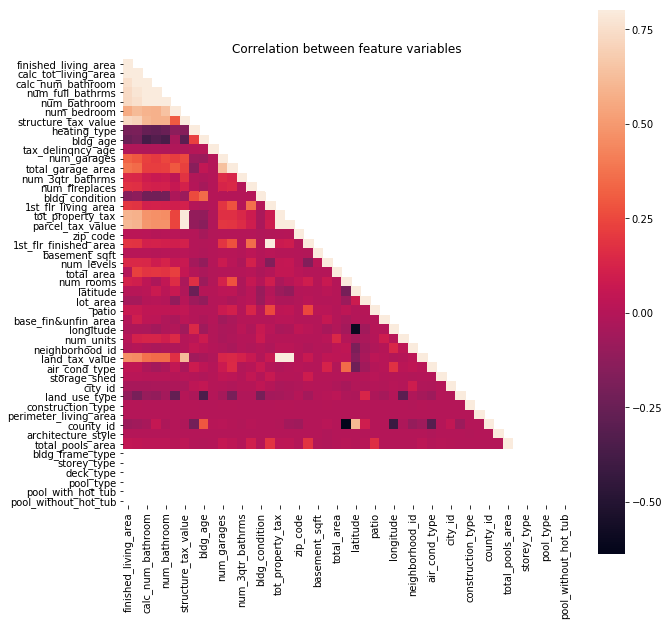

In [79]:
# set the number of features to 15.  This can be varied in deciding on the optimal model, based on the data available.
num_features=50

top_features=nulls_details_and_corr["Item"].tolist()[:num_features]
#top_features_corr=corr_df[co]

corrMatrix = train_enhanced[top_features].corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMatrix, mask=mask,vmax=.8, square=True)
ax.set_title("Correlation between feature variables")

#plt.show()

## Pass Variables Between Notebooks

In [80]:
%store train_enhanced
%store categorical_vars
%store non_categorical_vars
%store nulls_details
%store non_sparse_features
%store corr_matrix

Stored 'train_enhanced' (DataFrame)
Stored 'categorical_vars' (DataFrame)
Stored 'non_categorical_vars' (DataFrame)
Stored 'nulls_details' (DataFrame)
Stored 'non_sparse_features' (list)
Stored 'corr_matrix' (DataFrame)
